In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("IPL Matches 2008-2020.csv")

In [6]:
df.shape

(816, 17)

In [77]:
df.head(-5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1216542,Dubai,2020-10-08,JM Bairstow,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,69.0,N,AK Chaudhary,Nitin Menon
807,1216543,Dubai,2020-10-14,A Nortje,Dubai International Cricket Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,13.0,N,AK Chaudhary,Nitin Menon
808,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,C Shamshuddin,RK Illingworth
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,CB Gaffaney,VK Sharma


In [73]:
df['neutral_venue'].value_counts()

0    739
1     77
Name: neutral_venue, dtype: int64

In [71]:
df.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [9]:
# since method has so many null values and we dont need it we will remove it
df = df.drop('method', axis = 1)

In [10]:
df.shape

(816, 16)

#### 'MOST WINS'

In [11]:
# which team won and how many times 'MOST WINS'

In [20]:
temp = pd.DataFrame({'winner': df['winner']})
count_wins =temp.value_counts()

In [22]:
labels = [x[0] for x in count_wins.keys()]

In [23]:
labels

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Delhi Capitals',
 'Gujarat Lions',
 'Pune Warriors',
 'Rising Pune Supergiant',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiants']

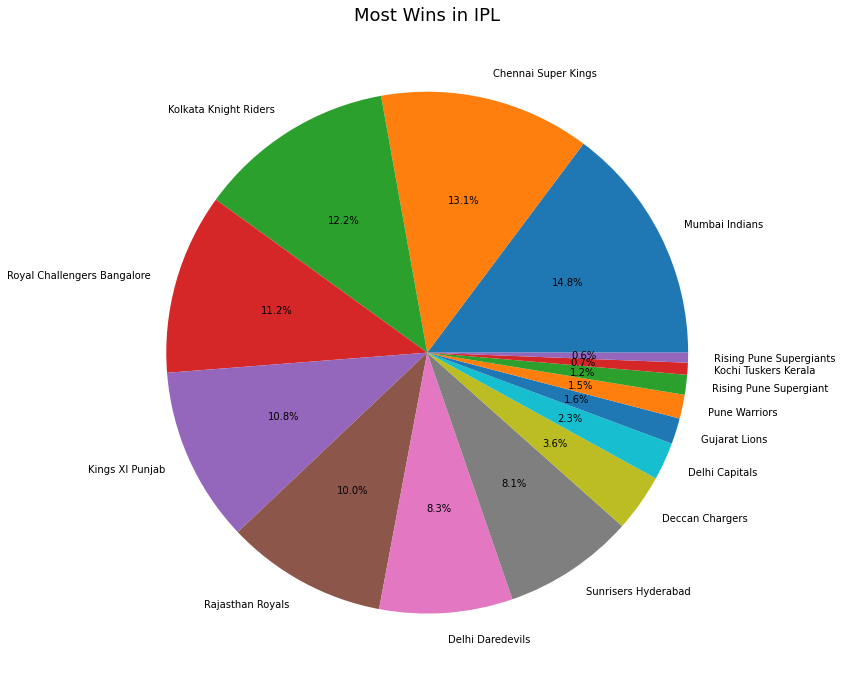

In [39]:
bar, ax = plt.subplots(figsize = (12,12))
ax = plt.pie(x = count_wins,  autopct='%.1f%%' ,labels = labels)
plt.title("Most Wins in IPL", fontsize = 18)
plt.show()

### Most wins in eliminator

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


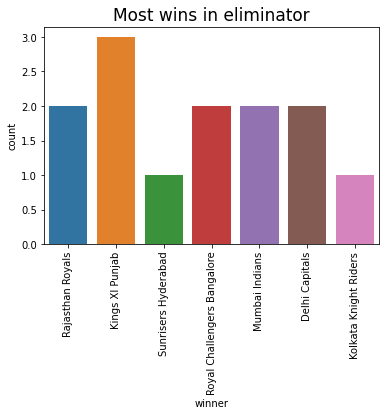

In [45]:
sns.countplot(df['winner'][df['eliminator'] == 'Y'], data = df)
plt.title("Most wins in eliminator", fontsize = 17)
plt.xticks(rotation = 90)
plt.show()

### Toss decision

In [46]:
teams = df['toss_winner'].unique()
teams

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [49]:
decision_making = pd.DataFrame([], columns=['toss_winner', 'Decision', 'times'])

for id, element in enumerate(teams):
    temp_bat = df[(df['toss_winner']== element) & (df['toss_decision'] == 'bat')]
    temp_field = df[(df['toss_winner']== element) & (df['toss_decision'] == 'field')]
    # if list of team == toss_winner and they chose to bet then append to decision making
    
   # appending to decision making
    decision_making = decision_making.append({'toss_winner': element, 
                                              'Decision': 'bat', 'times': temp_bat['toss_winner'].count()}, ignore_index = True)
    
    decision_making = decision_making.append({'toss_winner': element, 
                                              'Decision': 'field', 'times': temp_field['toss_winner'].count()}, ignore_index = True)

In [50]:
decision_making

,toss_winner,Decision,times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


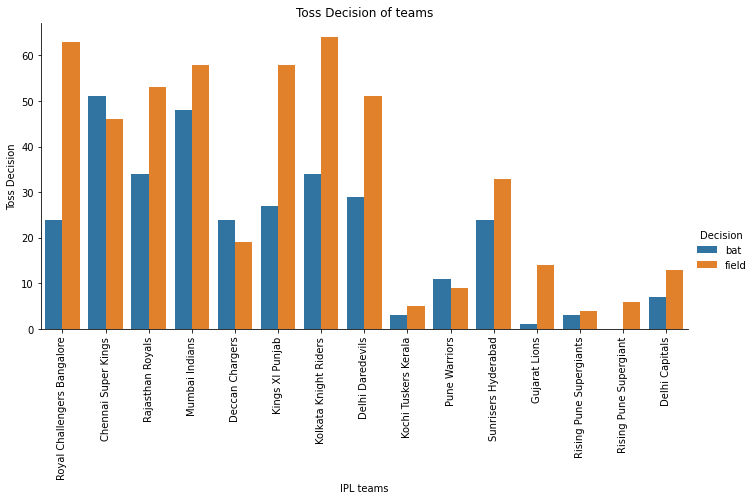

In [54]:
sns.catplot(x= "toss_winner", y ='times', hue = 'Decision', data = decision_making, kind = 'bar', height = 5, aspect = 2)
plt.xticks(rotation = 90)
plt.title("Toss Decision of teams")
plt.xlabel('IPL teams')
plt.ylabel('Toss Decision')
plt.show()

### Famous venues

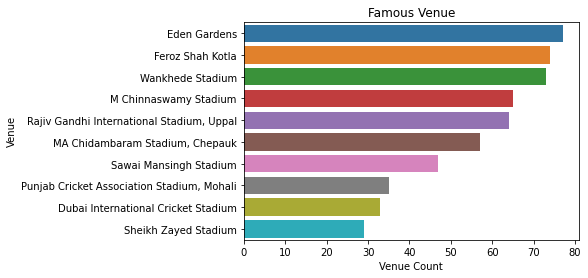

In [57]:
sns.barplot(x=df['venue'].value_counts().head(10).values,
           y = df['venue'].value_counts().head(10).index, data = df)
plt.title('Famous Venue')
plt.xlabel('Venue Count')
plt.ylabel("Venue")
plt.show()

### Famous Umpire I

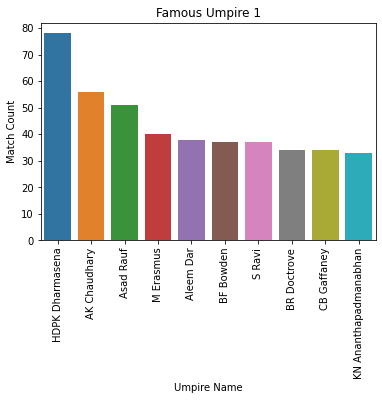

In [69]:
sns.barplot(y=df['umpire1'].value_counts().head(10).values,
           x= df['umpire1'].value_counts().head(10).index, data = df)
plt.title('Famous Umpire 1')
plt.ylabel('Match Count')
plt.xlabel("Umpire Name")
plt.xticks(rotation = 90)
plt.show()

### Famous Umpire II

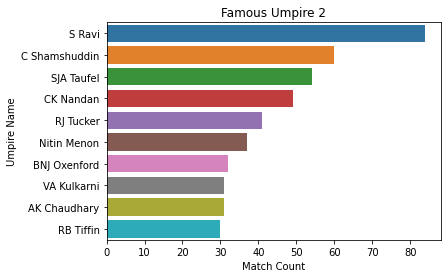

In [70]:
sns.barplot(x=df['umpire2'].value_counts().head(10).values,
           y= df['umpire2'].value_counts().head(10).index, data = df)
plt.title('Famous Umpire 2')
plt.xlabel('Match Count')
plt.ylabel("Umpire Name")
plt.show()